# <center>Network Science</center>

## <center>Home Assignment #1: Power law</center>

### <center>Student: *Alexander Salnikov*</center>

#### <hr /> General Information

**Due Date:** 08.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 

1) Check that Zipf's Law holds

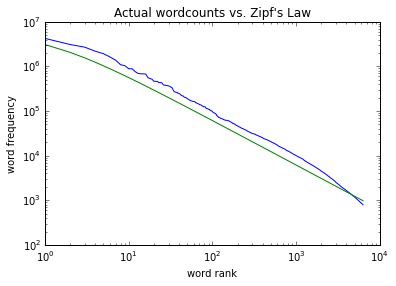

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.xkcd()
%matplotlib inline

wordcounts_data = np.genfromtxt("wordcounts.txt", dtype=np.int)
wordcounts = wordcounts_data[:,0]
wordcounts_zipfs_law = [wordcounts[0]/x for x in np.arange(1, len(wordcounts))]

plt.loglog(wordcounts, c="r")
plt.loglog(wordcounts_zipfs_law, c="b")
plt.title("Actual wordcounts vs. Zipf's Law")
plt.xlabel("word rank")
plt.ylabel("word frequency")

As we can see from plot, in general Zipf's Law holds on this dataset.

2) Assuming that the data is distributed according to the Power Law, find
 * $\alpha$  of the distribution
 * mean sample variance $\sigma^2$

In [4]:
alpha = 1 + (len(wordcounts)/np.sum(np.log(wordcounts/np.min(wordcounts))))
print("Alpha: ", alpha)
variance = np.var(wordcounts)
print("Variance: ", variance)

Alpha:  1.71941763006
Variance:  15360778764.5


3) Produce summary of the frequencies: min, max, mean, median

In [6]:
print("Min: ", np.min(wordcounts))
print("Max: ", np.max(wordcounts))
print("Mean: ", np.mean(wordcounts))
print("Median: ", np.median(wordcounts))

Min:  800
Max:  6187267
Mean:  13566.6707819
Median:  2335.0


### <hr /> Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)
* [Facebook network](http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt)


1) Are they correspondent to power law?

2) Find max and mean values of incoming and outcoming node degrees


Max of node degrees of network.txt: 2390
Mean of node degrees of network.txt: 4.21861255062
Max of in node degrees of web_Stanford.txt:

 38606
Max of out node degrees of web_Stanford.txt: 255
Mean of in node degrees of web_Stanford.txt: 8.20316562789
Mean of out node degrees of web_Stanford.txt: 8.20316562789
Max of node degrees of fb_Princeton.txt:

 628
Mean of node degrees of fb_Princeton.txt: 88.938750758


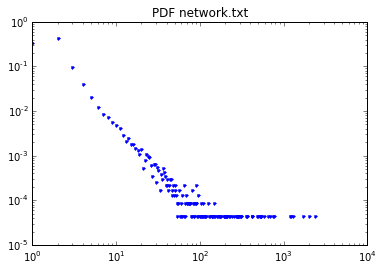

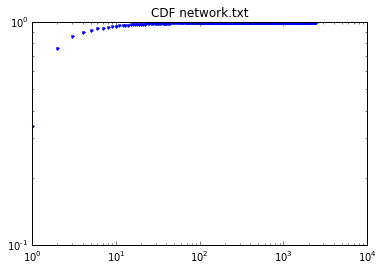

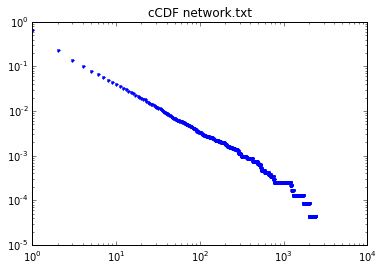

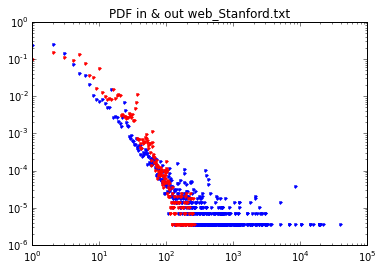

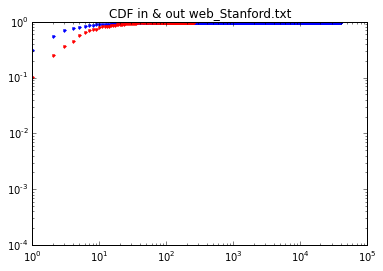

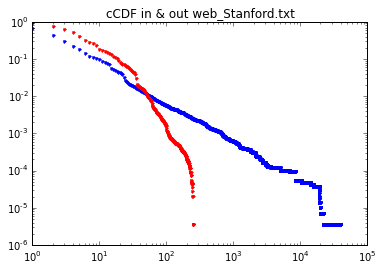

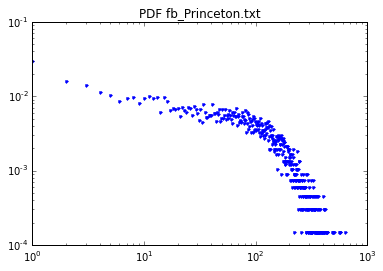

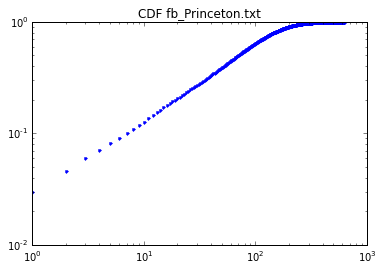

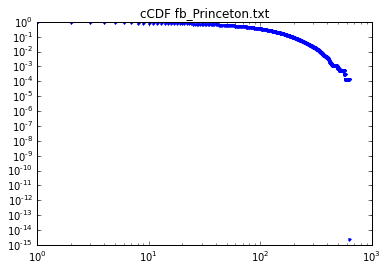

In [7]:
import networkx as nx

filenames = [
    ("network.txt",False),
    ("web_Stanford.txt",True),
    ("fb_Princeton.txt",False),
] 


def get_node_degrees(filename, direction=None):
    g = nx.read_edgelist(filename,create_using=nx.DiGraph())
    if direction == "in":
        return np.array(list(g.in_degree().values()), dtype=np.int)
    elif direction == "out":
        return np.array(list(g.out_degree().values()), dtype=np.int)
    else:
        return np.array(list(g.degree().values()), dtype=np.int)


def get_pdf(node_degrees):
    node_bincount_as_float = np.bincount(node_degrees).astype(float)
    return node_bincount_as_float/len(node_degrees)


def get_cdf(pdf):
    return np.cumsum(pdf)


def subtask_1_2(filename, is_directed=False):
    if is_directed:
        node_degrees_in = get_node_degrees(filename, direction="in")
        node_degrees_out = get_node_degrees(filename, direction="out")
        pdf_in = get_pdf(node_degrees_in)
        pdf_out = get_pdf(node_degrees_out)
        
        plt.figure()
        plt.loglog(pdf_in, "b.")
        plt.loglog(pdf_out, "r.")
        plt.title("PDF in & out {}".format(filename))
        
        cdf_in = get_cdf(pdf_in)
        cdf_out = get_cdf(pdf_out)
        plt.figure()
        plt.loglog(cdf_in, "b.")
        plt.loglog(cdf_out, "r.")
        plt.title("CDF in & out {}".format(filename))
        
        plt.figure()
        plt.loglog(1-cdf_in, "b.")
        plt.loglog(1-cdf_out, "r.")
        plt.title("cCDF in & out {}".format(filename))
        
        print("Max of in node degrees of {}:".format(filename), 
              np.max(node_degrees_in))
        print("Max of out node degrees of {}:".format(filename), 
              np.max(node_degrees_out))
        print("Mean of in node degrees of {}:".format(filename), 
              np.mean(node_degrees_in))
        print("Mean of out node degrees of {}:".format(filename), 
              np.mean(node_degrees_out))
    else:
        node_degrees = get_node_degrees(filename)
        pdf = get_pdf(node_degrees)
        
        plt.figure()
        plt.loglog(pdf, "b.")
        plt.title("PDF {}".format(filename))
        
        cdf = get_cdf(pdf)
        plt.figure()
        plt.loglog(cdf, "b.")
        plt.title("CDF {}".format(filename))
        
        plt.figure()
        plt.loglog(1-cdf, "b.")
        plt.title("cCDF {}".format(filename))
        print("Max of node degrees of {}:".format(filename), 
              np.max(node_degrees))
        print("Mean of node degrees of {}:".format(filename), 
              np.mean(node_degrees))

for (filename, is_dir) in filenames:
    subtask_1_2(filename,is_directed=is_dir)



3) Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

4) Determine $x_{min}$ via Kolmogorov-Smirnov test

In [8]:
def ks_test(filename, direction=None):

    node_degrees = get_node_degrees(filename, direction)
    node_frequencies = np.bincount(node_degrees)
    
    x_i = np.arange(1,len(node_frequencies)+1)
    
    model_distances = []
    
    for x_min in np.arange(1,len(node_frequencies)-1):
        x_i_stripped_by_x_min = x_i[x_min-1:]
        alpha = 1 + (len(x_i_stripped_by_x_min) / np.sum(np.log(x_i_stripped_by_x_min/x_min)))
        ideal_cdf = 1 - np.power(x_i_stripped_by_x_min/x_min,1 - alpha)
        
        exp_pdf = node_frequencies[x_min-1:] / np.sum(node_frequencies[x_min-1:])
        exp_cdf = np.cumsum(exp_pdf)
    
        model_distances.append(np.max(np.abs(exp_cdf-ideal_cdf)))
        
    best_x_min = np.argmin(model_distances)
    print("Best fitting x_min for {}: ".format(filename),best_x_min)
    x_i_stripped_by_best_x_min = x_i[best_x_min-1:]
    best_alpha = 1 + (len(x_i_stripped_by_best_x_min) / np.sum(np.log(x_i_stripped_by_best_x_min/best_x_min)))
    
    print("Best fitting aplha for {}: ".format(filename),best_alpha)
    print("Variance with respect to best x_min for {}".format(filename),
          np.var(node_frequencies[best_x_min:]))
    
    best_ideal_cdf = 1 - np.power(x_i_stripped_by_best_x_min/best_x_min,1 - best_alpha)
    best_exp_pdf = node_frequencies[best_x_min-1:] / np.sum(node_frequencies[best_x_min-1:])
    best_exp_cdf = np.cumsum(best_exp_pdf)
    
    plt.figure()
    plt.plot(best_exp_cdf,"b")
    plt.plot(best_ideal_cdf,"r")

Best fitting x_min for network.txt:  1104
Best fitting aplha for network.txt:  3.29555818892
Variance with respect to best x_min for network.txt 0.00464027037454


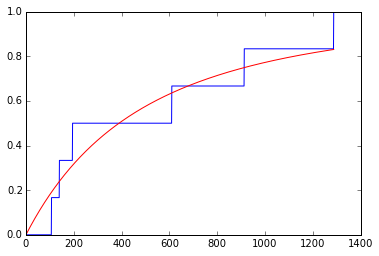

In [9]:
ks_test("network.txt")

Best fitting x_min for web_Stanford.txt:  3593
Best fitting aplha for web_Stanford.txt:  1.61801252531
Variance with respect to best x_min for web_Stanford.txt 0.00448292151695


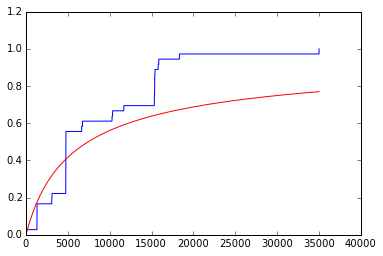

In [10]:
ks_test("web_Stanford.txt", direction="in")

Best fitting x_min for web_Stanford.txt:  172
Best fitting aplha for web_Stanford.txt:  5.72077393299
Variance with respect to best x_min for web_Stanford.txt 3.21031746032


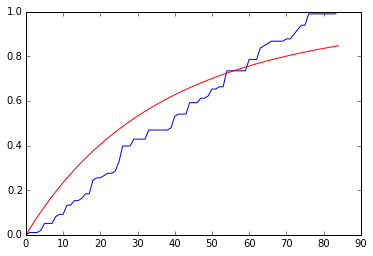

In [11]:
ks_test("web_Stanford.txt", direction="out")

Best fitting x_min for fb_Princeton.txt:  428
Best fitting aplha for fb_Princeton.txt:  5.88364920273
Variance with respect to best x_min for fb_Princeton.txt 0.0517313927873


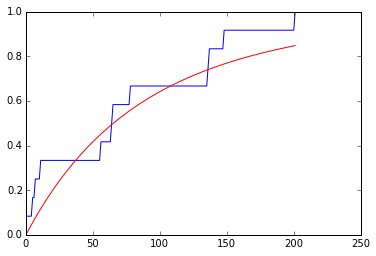

In [12]:
ks_test("fb_Princeton.txt")